# Логика и библиотеки NumPy и Pandas

## Логика высказываний

Логика — это не естественная, а *нормативная наука*, «наука о правильном мышлении». Её формализацию начал ещё древнегреческий философ Аристотель, при этом **формальную логику** он сам называл «аналитика».

История развития логики включает и средневековый схоластический период, и диалектическую логику Гегеля, но благодаря таким учёным, как Джордж Буль, Огастес де Морган, Чарльз Сандерс Пирс и другим, в XIX веке была разработана **математическая логика**, включающая логику высказываний, логику 1-го, 2-го и высших порядков.

**Логика высказываний** — это логика 0-го порядка. В ней бывают *атомарные* и *составные* высказывания. **Атомарные высказывания** для логики 0-го порядка являются неделимыми.

> Примеры атомарных высказываний: 
> 1. "*Петя любит Машу*",
> 2. "*2 + 2 = 4*", 
> 3. "*Через точку, лежащую вне прямой, можно провести только одну параллельную ей прямую*".

Каждое высказывание либо **истинно**, либо **ложно**, третьего не дано. Два этих значения составляют *булево множество* (в честь Джорджа Буля).

Для хранения логических значений в Python используется **логический тип `bool`**, у которого только два возможных состояния `True` и `False`. Обратите внимание, что они пишутся с заглавной буквы.

Надо сказать, что как в жизни, так и в программировании, реально бывает третий вариант — высказывание нельзя вычислить: в процессе его вычисления происходит ошибка, например, деление на ноль.

In [ ]:
a = True
b = False
print(a, type(a))
print(b, type(b))

True <class 'bool'>
False <class 'bool'>


In [ ]:
print(1j - 1j, bool(1j - 1j), type(1j - 1j))

0j False <class 'complex'>


Атомарные высказывания обретают истинность или ложность в рамках некоторой "языковой игры", некоторой теории. Например, высказывание про точку и прямую является истинной аксиомой в геометрии Евклида, но ложной в геометрии Лобачевского или Римана. Короче говоря, высказывания не бывают истинными или ложными "в вакууме", важен контекст.

В языках программирования таких трудностей практически нет: высказывание — это выражение, которое возвращает логическое значение. Оно должно быть синтаксически корректным и вычислимым без ошибок за конечное время.
С точки зрения алгебры логики они являются *предикатами*, которые, вычисляясь для конкретных значений переменных, далее являются простыми логическими значениями `True` или `False`.

Вот примеры таких предикатов для чисел:

In [ ]:
x = 55

In [ ]:
x > 10

True

In [ ]:
x == 100

False

In [ ]:
15.3 < x <= 62.5

True

Для строк и множеств есть удобные операции `in` и `not in`: 

In [ ]:
"слово" in "Какой-то текст, возможно, содержащий слово"

True

In [ ]:
"слово" not in "Какой-то текст, возможно, содержащий слово"

False

In [ ]:
"пицца" in {"борщ", "макароны", "сосиска", "чай", "булочка"}

False

In [ ]:
"пицца" not in {"борщ", "макароны", "сосиска", "чай", "булочка"}

True

Числовое значение лжи — ноль, истины — единица. При изучении алгебры логики их для краткости так и обозначают.

В Python числовой и логический тип отличаются, но они всё-таки связаны друг с другом этой логикой: `False` — `0`, `True` — `1`:

In [ ]:
int(False)

0

In [ ]:
int(True)

1

Применение арифметической операции к логическому значению автоматически (неявно) делает его числом 0 или 1.

Используем этот факт — выполним сложение логических выражений `(char in wordX)`, чтобы посчитать, для скольких слов это высказывание является истинным.

In [ ]:
word1, word2, word3 = "складываем", "логические", "выражения"
for char in "абвгдежзик":
    print("Символ", char, "есть в", (char in word1) + (char in word2) + (char in word3), "словах.")

Символ а есть в 2 словах.
Символ б есть в 0 словах.
Символ в есть в 2 словах.
Символ г есть в 1 словах.
Символ д есть в 1 словах.
Символ е есть в 3 словах.
Символ ж есть в 1 словах.
Символ з есть в 0 словах.
Символ и есть в 2 словах.
Символ к есть в 2 словах.


Можно *приводить* значения в обратном направлении — из числового в логический тип. В этом случае истиной становится не только единица, но и *любое ненулевое число*.

In [ ]:
for x in -5, -2, 0, 1, 100:
    print(f'bool({x:3}) ==', bool(x))

bool( -5) == True
bool( -2) == True
bool(  0) == False
bool(  1) == True
bool(100) == True


### Логические операции И, ИЛИ, НЕ
**Составные высказывания** образуются из атомарных при помощи **логических операций**. Они бывают *унарные* — применимые к одному значению, и *бинарные* — применимые к двум значениям.

Операции  И, ИЛИ, НЕ — это три стандартные логические функции, которые задают полный *базис*. Это значит, что при их помощи может быть выражена любая логическая функция. Но что вообще такое логическая функция и как она задаётся?

**Функция** — это отображение из области определения в множество значений. Для логических функций это булево множество {True, False}.

Однако, удобнее задавать логическую функцию **таблицей истинности** — перечислить, чему она равна в каждом конкретном случае.
#### Таблица истинности для НЕ:
| x | not x |
|---|-------|
| 0 | 1     |
| 1 | 0     |

Проверим её при помощи Python:

In [ ]:
print('x', 'not x', sep='\t| ')
print('-'*16)
for x in False, True:
    print(x, not x, sep='\t| ')

x	| not x
----------------
False	| True
True	| False


#### Таблицы истинности для И и ИЛИ:
| x | y | x and y|
|---|---|--------|
| 0 | 0 | 0      |
| 0 | 1 | 0      |
| 1 | 0 | 0      |
| 1 | 1 | 1      |

| x | y | x or y|
|---|---|-------|
| 0 | 0 | 0     |
| 0 | 1 | 1     |
| 1 | 0 | 1     |
| 1 | 1 | 1     |

Вычислим их же на Python:

In [ ]:
print('', 'x', 'y', 'x and y', 'x', 'y', 'x xor y', sep='\t| ')
print('\t', '-'*25, '\t', '-'*24, sep='')
for x in False, True:
    for y in False, True:
        print('', x, y, x and y, sep='\t| ', end='\t')
        print('', x, y, x or y, sep='\t| ')

	| x	| y	| x and y	| x	| y	| x xor y
	-------------------------	------------------------
	| False	| False	| False		| False	| False	| False
	| False	| True	| False		| False	| True	| True
	| True	| False	| False		| True	| False	| True
	| True	| True	| True		| True	| True	| False


Обратите внимание, что ИЛИ является *неисключающим*. Это значит, что вот такое составное высказывание будет истинным:

In [ ]:
"ворон" in "Ты его проворонил!" or "ворон" in "Я поймал ворона."

True

#### Приоритеты операций
Если сложное выражение содержит несколько операторов, то они вычисляются в следующей последовательности: вначале действует `not`, затем действует `and`, а затем `or`. Если этот порядок действий нужно изменить, то управлять последовательностью вычислений могут обычные круглые скобки.

Зададим логическую функцию, по которой собака на цепи решает, пропускать ей пытающуюся войти группу людей или нет:

In [ ]:
def dog_allows_passage(group):
    owner = "хозяин"
    child = "ребёнок хозяина"
    alien = "подозрительный незнакомец"
    
    return owner in group or child in group and not alien in group

По умолчанию тут такой порядок:
``` text
owner in group or child in group and not alien in group
               3                  2   1
```
Таким образом, наличие хозяина в группе людей даёт проход при любых людях в группе, а ребёнок обеспечивает проход только при отсутствии в группе подозрительного незнакомца.

In [ ]:
for group in [{"хозяин"},
              {"хозяин", "ребёнок хозяина"},
              {"хозяин", "подозрительный незнакомец"},
              {"ребёнок хозяина"},
              {"ребёнок хозяина", "друг ребёнка"},
              {"ребёнок хозяина", "подозрительный незнакомец"},
              {"подозрительный незнакомец"}]:
    if dog_allows_passage(group):
        message = "Пропустить в дом"
    else:
        message = "Запретить проход"
    print(message, group)

Пропустить в дом {'хозяин'}
Пропустить в дом {'ребёнок хозяина', 'хозяин'}
Пропустить в дом {'хозяин', 'подозрительный незнакомец'}
Пропустить в дом {'ребёнок хозяина'}
Пропустить в дом {'ребёнок хозяина', 'друг ребёнка'}
Запретить проход {'ребёнок хозяина', 'подозрительный незнакомец'}
Запретить проход {'подозрительный незнакомец'}


Ещё один типичный пример, когда важно понимать расстановку приоритетов:
`A and B or C and D` будет правдой тогда, когда A одновременно истинно с B или же C одновременно истинно с D.

Если же мы хотим сделать выражение, где требуется одновременная истинность A, D, а также одного из двух — B или C, то нам обязательно нужно использовать скобки, чтобы Python понял необходимый нам порядок операций:
`A and (B or C) and D`.

### Задача из демо-варианта ЕГЭ по информатике 2008 года
Вам дано логическое уравнение, зависящее от нескольких логических переменных.
Требуется найти количество решений данного логического уравнения.

$(\lnot (K \lor L) \lor (L \land M \land N)) = 0$

В ЕГЭ предполагалось, что эта задача решается вручную через тождественные преобразования и аккуратный перебор предположений. Мы можем воспользоваться полным перебором решений при помощи Python:

In [ ]:
count = 0
for K in False, True:
    for L in False, True:
        for M in False, True:
            for N in False, True:
                count += (not (K or L) or (L and M and N)) == False
print("Количество решений: ", count)

Количество решений:  10


Впрочем, писать несколько вложенных циклов не очень удобно, и здесь мы можем заменить это вложение через декартово произведение из модуля itertools:

In [ ]:
import itertools
B = (False, True)
count = 0
for K, L, M, N in itertools.product(B, B, B, B):
    count += ((not (K or L) or (L and M and N)) == False)
print("Количество решений: ", count)

Количество решений:  10


### Ленивые операции И и ИЛИ
Если значение высказывания уже ясно исходя из значения левого операнда (того, что *слева* от оператора), то логический оператор "ленится" вычислять правый операнд. Иногда это бывает важно, особенно если вычисление правого операнда невозможно при условии истинности или ложности левого.

В большинстве случаев не важно, какое высказывание стоит слева, а какое справа от И и ИЛИ, поскольку таблица истинности от этого не зависит.
Но вот пример, когда мы явно пользуемся "ленивыми операциями":

In [ ]:
A = "UCAGAGCGGAUAGUGACGC"
i = 10

In [ ]:
i < len(A) and A[i] == 'U'

True

In [ ]:
A[i] == 'U' and i < len(A)

True

Если вам показалось, что второе выражение эквивалентно первому, то посмотрите на эту ошибку. Выражения абсолютно те же самые, но значение `i` другое, в результате во втором высказывании возникает ошибка:

In [ ]:
A = "UCAGAGCGGAUAGUGACGC"
i = 20

In [ ]:
i < len(A) and A[i] == 'U'

False

In [ ]:
A[i] == 'U' and i < len(A)

IndexError: ignored

### Функции all и any
Когда требуется осуществить длинное логическое И/ИЛИ с целой последовательностью булевых значений, используются функции `all` и `any`. Они работают с любыми итерируемыми объектами, а значит, их удобно использовать вкупе с генераторами.

Допустим, у студента-биолога есть два набора отрезков матричных РНК. Он хочет определить, во всех ли отрезках есть кодон *метионина* — триплет нуклеотидных остатков, который кодирует аминокислоту *метионин*.

In [ ]:
methionine_code = "AUG"
A = ["GCAAUGGCA", "GCAGUAAAU", "CGAACCAGU"]
B = ["AUGGCAGCA", "GCAUGAAAU", "CGAACCAUG"]

In [ ]:
all(methionine_code in gene for gene in A)

False

In [ ]:
all(methionine_code in gene for gene in B)

True

А теперь его задача узнать, есть ли кодон *метионина* хоть в каком-нибудь отрезке из набора:

In [ ]:
any(methionine_code in gene for gene in A)

True

In [ ]:
any(methionine_code in gene for gene in B)

True

## NumPy и логические выражения

### Векторные логические операции
Как вы уже знаете, операции с массивами NumPy векторные, то есть они выполняются сразу со всеми элементами массива. Это касается не только домножений на число и применений функций NumPy, но и логических операций:

In [ ]:
import numpy as np
A = np.array([10, 53, 61, 23, 66, 12, 63, 63, 36, 77, 91, 82]).reshape((3, 4))
print(A)
print(A > 50)

[[10 53 61 23]
 [66 12 63 63]
 [36 77 91 82]]
[[False  True  True False]
 [ True False  True  True]
 [False  True  True  True]]


Ценно то, что такой **массив логических значений может быть использован для доступа к элементам исходного массива** как на чтение, так и на запись. Для этого важно совпадение `shape` данных массивов. Можно считать, что логический массив является как бы "маской доступа" к элементам исходного массива.

Теперь мы можем занулить элементы по некоторому условию:

In [ ]:
B = A.copy()
B[B > 50] *= 10
print(B)

[[ 10 530 610  23]
 [660  12 630 630]
 [ 36 770 910 820]]


Или поменять им знак:

In [ ]:
B = A.copy()
B[B > 50] *= -1  # Домножить на минус единицу.
print(B)

[[ 10 -53 -61  23]
 [-66  12 -63 -63]
 [ 36 -77 -91 -82]]


Тем же синтаксисом может быть выполнена операция с картинкой, изменяющая значение цветового канала пиксела по условию на значение этого канала пиксела.

In [ ]:
!wget -O "2_python.jpg" "https://drive.google.com/uc?id=1vNnDQU5KEi1yxA60sv91S2gCdhy3LkYr&export=download"

--2022-11-28 12:06:09--  https://drive.google.com/uc?id=1vNnDQU5KEi1yxA60sv91S2gCdhy3LkYr&export=download
Resolving drive.google.com (drive.google.com)... 108.177.97.139, 108.177.97.138, 108.177.97.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vdpdq5g7ed2bqhhb8cb186ooq7vkvskb/1669637100000/05476118052512889131/*/1vNnDQU5KEi1yxA60sv91S2gCdhy3LkYr?e=download&uuid=50189891-a556-4343-994a-84acd763130f [following]
--2022-11-28 12:06:10--  https://doc-0c-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vdpdq5g7ed2bqhhb8cb186ooq7vkvskb/1669637100000/05476118052512889131/*/1vNnDQU5KEi1yxA60sv91S2gCdhy3LkYr?e=download&uuid=50189891-a556-4343-994a-84acd763130f
Resolving doc-0c-1g-docs.googleusercontent.com (doc-0c-1g-docs.googleusercontent.com)... 64.233.189.132, 2404:

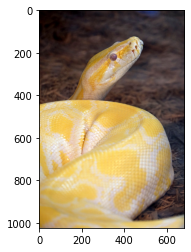

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread("2_python.jpg")
plt.imshow(image)

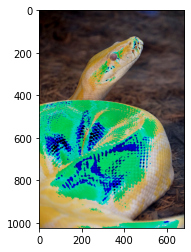

In [ ]:
data = image.copy()
data[data > 220] = 0
plt.imshow(data)

#### Логические операции с логическими массивами NumPy
Раз массивы логических значений так удобны, стоит узнать как осуществлять с ними массовые, *векторные логические операции*.
Создадим два логических массива для экспериментов:

In [ ]:
import numpy as np
A = np.array([False, False, True, True])
B = np.array([False, True, False, True])

Однако логические операции `and`, `or` и `not` с массивами NumPy не работают!

In [ ]:
A and B

ValueError: ignored

Зато работают операции `&`, `|`, `~`:

In [ ]:
print(A)
print(B)
print(A & B)

[False False  True  True]
[False  True False  True]
[False False False  True]


In [ ]:
print(A)
print(B)
print(A | B)

[False False  True  True]
[False  True False  True]
[False  True  True  True]


In [ ]:
print(A)
print(~A)

[False False  True  True]
[ True  True False False]


###  Редукция массивов NumPy методами any и all
Для редукции логического массива лучше пользоваться не стандартными `all` и `any`, а **аналогичными методами** массива:

In [ ]:
import numpy as np
logical_array = np.array([[ True,  True,  True,  True,  True],
                          [ True, False, False, False,  True],
                          [False,  True, False, False,  True],
                          [False, False, False, False,  True]])

In [ ]:
any(logical_array)

ValueError: ignored

In [ ]:
logical_array.any()

True

При этом в NumPy можно провести редукцию логического массива по конкретной оси!

Для этого в параметре метода укажем индекс оси:

In [ ]:
logical_array.any(0)

array([ True,  True,  True,  True,  True])

In [ ]:
logical_array.any(1)

array([ True,  True,  True,  True])

In [ ]:
logical_array.all(0)

array([False, False, False, False,  True])

In [ ]:
logical_array.all(1)

array([ True, False, False, False])

## Основы работы с данными в Pandas
Pandas — популярная библиотека для работы с табличными данными различных типов.
С её помощью загрузка файла в формате CSV или XLS становится примитивной:

In [ ]:
!wget -O "demodata.csv" "https://drive.google.com/uc?id=1q7uSBWVzmanMtdtnBUOjJm8BXwBgAb0p&export=download"

--2022-04-21 07:43:38--  https://drive.google.com/uc?id=1q7uSBWVzmanMtdtnBUOjJm8BXwBgAb0p&export=download
Resolving drive.google.com (drive.google.com)... 74.125.201.100, 74.125.201.113, 74.125.201.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.201.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gnj3p733ii9j313s8tlh1rnoam9i099a/1650526950000/05476118052512889131/*/1q7uSBWVzmanMtdtnBUOjJm8BXwBgAb0p?e=download [following]
--2022-04-21 07:43:38--  https://doc-14-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gnj3p733ii9j313s8tlh1rnoam9i099a/1650526950000/05476118052512889131/*/1q7uSBWVzmanMtdtnBUOjJm8BXwBgAb0p?e=download
Resolving doc-14-1g-docs.googleusercontent.com (doc-14-1g-docs.googleusercontent.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to doc-14-1g-docs.googleusercontent.com (doc-14-1g-doc

In [ ]:
import pandas as pd
data = pd.read_csv("demodata.csv")

Что за тип у объекта, который хранит считанные из файла данные?

In [ ]:
type(data)

pandas.core.frame.DataFrame

`DataFrame` — основной тип библиотеки Pandas, и почти все операции над листом с данными будут осуществляться через его методы.

Размеры листа хранятся в *атрибуте* `shape`:

In [ ]:
data.shape

(10, 6)

### Знакомство с данными
После того, как вы открыли файл, нужно познакомиться с данными. Для этого есть несколько путей.

Посмотреть на несколько первых строк:

In [ ]:
data

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False
1,1,2008-05-01,Thu,0.076192,3.167181e+06,True
2,2,2008-05-02,Fri,-0.868510,9.589767e+06,False
3,3,2008-05-03,Sat,-0.427011,8.949415e+06,False
4,4,2008-05-04,Sun,0.253255,9.371634e+05,True
5,5,2008-05-05,Mon,-0.681516,9.495799e+05,False
6,6,2008-05-06,Tue,0.007191,7.268427e+06,True
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True
8,8,2008-05-08,Thu,-1.184101,1.920960e+06,False
9,9,2008-05-09,Fri,-1.580369,8.456241e+06,False


In [ ]:
data.head()

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False
1,1,2008-05-01,Thu,0.076192,3.167181e+06,True
2,2,2008-05-02,Fri,-0.868510,9.589767e+06,False
3,3,2008-05-03,Sat,-0.427011,8.949415e+06,False
4,4,2008-05-04,Sun,0.253255,9.371634e+05,True


Иногда полезно посмотреть не только на "голову", но и на "хвостик" листа с данными:

In [ ]:
data.tail(3)

,clientid,date,weekdays,gains,prices,up
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True
8,8,2008-05-08,Thu,-1.184101,1.920960e+06,False
9,9,2008-05-09,Fri,-1.580369,8.456241e+06,False


Узнать подробную информацию о названиях и *типах данных* в столбцах:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  10 non-null     int64  
 1   date      10 non-null     object 
 2   weekdays  10 non-null     object 
 3   gains     10 non-null     float64
 4   prices    10 non-null     float64
 5   up        10 non-null     bool   
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 538.0+ bytes


Основные статистические характеристики, описывающие распределение величин в числовых столбцах:

In [ ]:
data.describe()

,clientid,gains,prices
count,10.00000,10.000000,1.000000e+01
mean,4.50000,-0.425495,5.654715e+06
std,3.02765,0.690446,3.485657e+06
min,0.00000,-1.580369,9.371634e+05
25%,2.25000,-0.821761,2.232515e+06
50%,4.50000,-0.475796,7.392721e+06
75%,6.75000,0.058941,8.290031e+06
max,9.00000,0.674497,9.589767e+06


### Серии данных в конкретном столбце

Для дальнейшей работы с данными нам понадобится список столбцов.
Обратите внимание, что это *не метод*, а просто **атрибут** листа с данными, а значит `columns` не нужно вызывать с круглыми скобками:

In [ ]:
data.columns

Index(['clientid', 'date', 'weekdays', 'gains', 'prices', 'up'], dtype='object')

Для того, чтобы получить один столбец из листа, нужно написать имя столбца в кавычках и квадратных скобках:

In [ ]:
data["date"]

0    2008-04-30
1    2008-05-01
2    2008-05-02
3    2008-05-03
4    2008-05-04
5    2008-05-05
6    2008-05-06
7    2008-05-07
8    2008-05-08
9    2008-05-09
Name: date, dtype: object

Тип данных у одного столбца с данными уже не `DataFrame`, а `Series`. 

In [ ]:
type(data.date)

pandas.core.series.Series

Серию данных из столбца можно также получить, обратившись к нему по имени через точку после имени листа с данными:

In [ ]:
data.date

0    2008-04-30
1    2008-05-01
2    2008-05-02
3    2008-05-03
4    2008-05-04
5    2008-05-05
6    2008-05-06
7    2008-05-07
8    2008-05-08
9    2008-05-09
Name: date, dtype: object

### Фильтрация Pandas DataFrame по логическому условию

In [ ]:
query = data[data.up]
query

,clientid,date,weekdays,gains,prices,up
1,1,2008-05-01,Thu,0.076192,3.167181e+06,True
4,4,2008-05-04,Sun,0.253255,9.371634e+05,True
6,6,2008-05-06,Tue,0.007191,7.268427e+06,True
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True


In [ ]:
query["prices"]

1    3.167181e+06
4    9.371634e+05
6    7.268427e+06
7    7.517015e+06
Name: prices, dtype: float64

In [ ]:
query["prices"].mean()

4722446.46745914

In [ ]:
query["prices"].std()

3216563.773601599

In [ ]:
data[data.weekdays == 'Wed']

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True


Что делать, если мы хотим применить оба условия — потребовать их одновременной истинности?
Как и к массивам NumPy, операции `and`, `or` и `not` к листам с данными неприменимы.

Нужно пользоваться операторами `&`, `|`, `~`, которые приводят к массовым операциям.
Единственное, что нужно учесть, что приоритет этих операций выше, чем у обычных логических, а значит *атомарные высказывания* нужно окружать скобками:

In [ ]:
query = data[(data.weekdays == 'Wed') & (~data.up)]  # Нужны скобки!
query

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False


### Фильтрация при помощи метода `query`
Выбор нужных строк листа при помощи массива логических значений, получаемых из этого же листа, неплох. Но если наименование листа длинное, то записывать его в строке несколько раз кажется затруднительным. Кроме того, необходимость заменять операции может дополнительно затруднить восприятие.

Можно формулировать запрос отбора нужных строк намного проще — через метод `query`:

In [ ]:
data.query('weekdays == "Wed" and up')

,clientid,date,weekdays,gains,prices,up
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True


При помощи `query` легко формулировать сложные условия отбора. Например, выделим только те строки, где день недели — это воскресенье или же цены ниже среднего и при этом доходы отрицательны:

In [ ]:
result = data.query('weekdays == "Sun" or prices < prices.mean() and gains < 0')
result
print("Сумма доходов по данным сделкам:", result['gains'].sum())

Сумма доходов по данным сделкам: -1.61236186952339


### Гистограмма распределения

Модуль Pandas под капотом неявно подключает Matplotlib, поэтому для построения гистограммы распределения не нужно его отдельно подключать, а просто воспользоваться методом `hist`:

<AxesSubplot:>

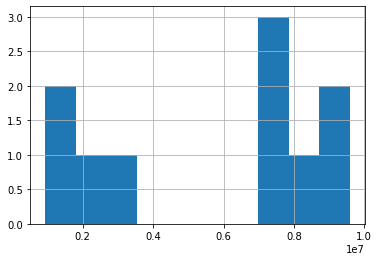

In [ ]:
data["prices"].hist()

### Статистические характеристики выборки данных
Для того чтобы узнать конкретную статистическую характеристику, можно воспользоваться следующими методами:

In [ ]:
data["prices"].min()

937163.4437525265

In [ ]:
data["prices"].max()

9589766.961382903

In [ ]:
print("Среднее значение:", data["prices"].mean())

Среднее значение: 5654715.206961571


In [ ]:
print("Стандартное отклонение:", data["prices"].std())

Стандартное отклонение: 3485656.980782873


In [ ]:
print("Медиана:", data["prices"].median())

Медиана: 7392720.84472501


Кроме медианы можно указать любой квантиль распределения:

In [ ]:
print("Первый квартиль:", data["prices"].quantile(1/4))
print("Третий квартиль:", data["prices"].quantile(3/4))

Первый квартиль: 2232514.840920421
Третий квартиль: 8290031.4672024455


При этом можно применить условие выбора строк по логическому массиву:

In [ ]:
data[data.up]["prices"].mean()

4722446.46745914

А сам логический массив получить через наложение условий на исходный лист с данными:

In [ ]:
data[data.weekdays == 'Wed']["prices"].mean()

7654209.39604469

## Анализ данных абитуриентов Мехмата МГУ
Интересно будет применить наши знания и проанализировать данные приёмной кампании мехмата МГУ по общему конкурсу в 2021 году. Естественно, при анализе данных живых людей возникает *вопрос об этике их использования*, и *вопрос о соблюдении законодательства о персональных данных* (Федеральный закон "О персональных данных" от 27.07.2006 N 152-ФЗ).

Для того чтобы работать с такими данными без особого допуска, осуществляется их деперсонализация, **обезличивание**, то есть такое действие, после которого конкретное физическое лицо не может быть напрямую связано с его данными. Наши данные уже обезличены, поэтому смело будем с ними работать.

Давайте посмотрим на сами данные:

In [ ]:
!wget -O "math_entrants.csv" "https://drive.google.com/uc?id=1P8496NAnNN6zY38ZRSmtQwqXOg1Czz4-&export=download"

--2022-04-21 07:43:08--  https://drive.google.com/uc?id=1P8496NAnNN6zY38ZRSmtQwqXOg1Czz4-&export=download
Resolving drive.google.com (drive.google.com)... 74.125.201.100, 74.125.201.138, 74.125.201.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.201.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n8j0de786vfdtiom98i45hcn9utbjsff/1650526950000/05476118052512889131/*/1P8496NAnNN6zY38ZRSmtQwqXOg1Czz4-?e=download [following]
--2022-04-21 07:43:09--  https://doc-08-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n8j0de786vfdtiom98i45hcn9utbjsff/1650526950000/05476118052512889131/*/1P8496NAnNN6zY38ZRSmtQwqXOg1Czz4-?e=download
Resolving doc-08-1g-docs.googleusercontent.com (doc-08-1g-docs.googleusercontent.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to doc-08-1g-docs.googleusercontent.com (doc-08-1g-doc

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
entrants = pd.read_csv("math_entrants.csv")
entrants.head()

,№,Наличие согласия,Согласие в МГУ,Сумма баллов,Математика (ДВИ),Математика (ЕГЭ),Физика,Русский язык,Индивидуальные достижения - аттестат,Индивидуальные достижения - сочинение,Индивидуальные достижения - ГТО,Преимущественное право зачисления,Право на общежитие,Статус
0,1,Да,Да,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
1,2,Нет,Нет,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
2,3,Нет,Нет,408,100,100,100,100,6,2,0,Нет,Да,В конкурсе
3,4,Нет,Да,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
4,5,Нет,Нет,407,100,99,100,100,6,2,0,Нет,Да,В конкурсе


Для простоты работы со столбцами переименуем их так, чтобы с ними было легче работать. Не будем отказываться полностью от русского языка, но сократим название каждого столбца до одного слова.

Воспользуемся функцией pandas.DataFrame.rename(), которая позволит нам переименовать столбцы. 

In [ ]:
entrants.rename(columns = {'Сумма баллов':'сумма',
                           'Математика (ДВИ)':'ДВИ',
                           'Математика (ЕГЭ)':'математика',
                           'Физика':'физика',
                           'Русский язык':'русский',
                           'Индивидуальные достижения - аттестат':'аттестат',
                           'Индивидуальные достижения - сочинение':'сочинение',
                           'Индивидуальные достижения - ГТО':'ГТО',
                           'Преимущественное право зачисления':'преимущество',
                           'Право на общежитие':'общежитие'},
                inplace = True)
entrants.head()

,№,Наличие согласия,Согласие в МГУ,сумма,ДВИ,математика,физика,русский,аттестат,сочинение,ГТО,преимущество,общежитие,Статус
0,1,Да,Да,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
1,2,Нет,Нет,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
2,3,Нет,Нет,408,100,100,100,100,6,2,0,Нет,Да,В конкурсе
3,4,Нет,Да,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
4,5,Нет,Нет,407,100,99,100,100,6,2,0,Нет,Да,В конкурсе


Всегда удобнее работать с типом данных bool, чем с типом данных string. Изменим тип данных в столбцах типа "Да/Нет" на логический:

In [ ]:
entrants["Наличие согласия"] = (entrants["Наличие согласия"] == "Да")
entrants["Согласие в МГУ"] = (entrants["Согласие в МГУ"] == "Да")
entrants["преимущество"] = (entrants["преимущество"] == "Да")
entrants["общежитие"] = (entrants["общежитие"] == "Да")
entrants.head()

,№,Наличие согласия,Согласие в МГУ,сумма,ДВИ,математика,физика,русский,аттестат,сочинение,ГТО,преимущество,общежитие,Статус
0,1,True,True,408,100,100,100,100,6,2,0,False,False,В конкурсе
1,2,False,False,408,100,100,100,100,6,2,0,False,False,В конкурсе
2,3,False,False,408,100,100,100,100,6,2,0,False,True,В конкурсе
3,4,False,True,408,100,100,100,100,6,2,0,False,False,В конкурсе
4,5,False,False,407,100,99,100,100,6,2,0,False,True,В конкурсе


In [ ]:
entrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   №                 905 non-null    int64 
 1   Наличие согласия  905 non-null    bool  
 2   Согласие в МГУ    905 non-null    bool  
 3   сумма             905 non-null    int64 
 4   ДВИ               905 non-null    int64 
 5   математика        905 non-null    int64 
 6   физика            905 non-null    int64 
 7   русский           905 non-null    int64 
 8   аттестат          905 non-null    int64 
 9   сочинение         905 non-null    int64 
 10  ГТО               905 non-null    int64 
 11  преимущество      905 non-null    bool  
 12  общежитие         905 non-null    bool  
 13  Статус            905 non-null    object
dtypes: bool(4), int64(9), object(1)
memory usage: 74.4+ KB


Проверим, не у всех ли студентов из данного списка статус "В конкурсе". Если это так, то данный столлбец ничем не поможет нам в анализе данных, и мы сможем его удалить

In [ ]:
(entrants['Статус'] == 'В конкурсе').all()

True

У всех. Значит этот столбец можно просто удалить:

In [ ]:
entrants.drop('Статус', axis=1, inplace=True)

Проверим то же самое про преимущество

In [ ]:
entrants["преимущество"].value_counts()

False    905
Name: преимущество, dtype: int64

In [ ]:
entrants["ГТО"].value_counts()

0    746
2    159
Name: ГТО, dtype: int64

In [ ]:
(entrants['преимущество'] == False).all()

True

Значит, от него также можно избавиться

In [ ]:
entrants.drop('преимущество', axis=1, inplace=True)

Общее описание всех параметров данных в pandas можно получить при помощи функции describe

In [ ]:
entrants.describe()

,№,сумма,ДВИ,математика,физика,русский,аттестат,сочинение,ГТО
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,453.000000,351.367956,77.662983,89.240884,89.038674,90.453039,2.671823,1.949171,0.351381
std,261.395295,27.547675,15.383455,7.546133,9.649823,6.576663,2.983645,0.314934,0.761534
min,1.000000,268.000000,50.000000,62.000000,55.000000,60.000000,0.000000,0.000000,0.000000
25%,227.000000,332.000000,65.000000,84.000000,84.000000,86.000000,0.000000,2.000000,0.000000
50%,453.000000,354.000000,80.000000,90.000000,91.000000,92.000000,0.000000,2.000000,0.000000
75%,679.000000,371.000000,90.000000,96.000000,97.000000,96.000000,6.000000,2.000000,0.000000
max,905.000000,408.000000,100.000000,100.000000,100.000000,100.000000,6.000000,2.000000,2.000000



Первое, что стоит сделать — посмотреть как выглядит распределение суммы баллов на гистограмме. Мы увидим, какую структуру имеют данные.

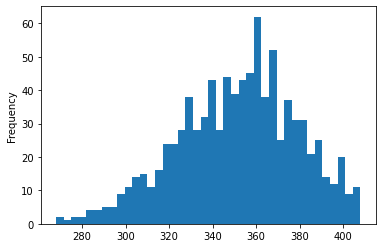

In [ ]:
entrants['сумма'].plot.hist(bins=40)

Проверим, такое же распределение получается у студентов, сдавших успешно ГТО? Может быть, ГТО существенно повлияло на их поступление, хотя они менее или более талантливы, чем другие студенты?

352.61006289308176


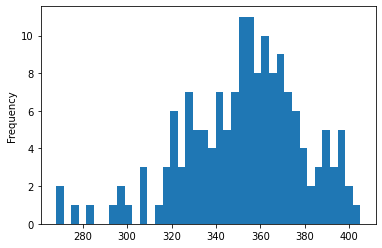

In [ ]:
print(entrants.query('ГТО == 2')['сумма'].mean())
entrants.query('ГТО == 2')['сумма'].plot.hist(bins=40)

Как мы видим, распределение очень похоже, имеет тот же максимум. Значит, наша гипотеза не верна. А что насчет несдавших ГТО?

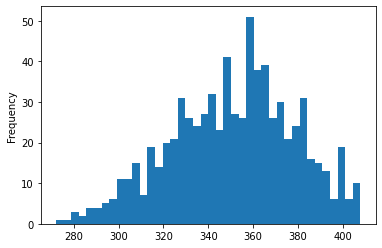

In [ ]:
entrants.query('ГТО == 0')['сумма'].plot.hist(bins=40)

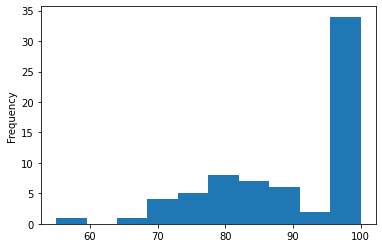

In [ ]:
entrants.query("`математика` == 100")["ДВИ"].plot.hist(bins=10)

Последняя гипотеза также оказалась верна. На деле не всегда бывает так.

Query — вообще очень мощный инструмент, позволяющий отфильтровать данные по ключевому запросу. Например, мы можем вывести всех абитуриентов, сдавших физику менее, чем на 80 баллов, следующей командой

In [ ]:
entrants.query("физика < 80") 

,№,Наличие согласия,Согласие в МГУ,сумма,ДВИ,математика,физика,русский,аттестат,сочинение,ГТО,общежитие
194,195,False,True,373,100,99,78,94,0,2,0,True
255,256,False,True,368,100,94,74,98,0,2,0,False
256,257,False,False,368,100,92,76,98,0,2,0,False
314,315,False,True,363,95,96,76,94,0,2,0,False
326,327,False,False,362,100,94,72,94,0,2,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
900,901,False,True,277,55,72,64,78,6,2,0,True
901,902,False,False,275,50,78,57,80,6,2,2,True
902,903,False,True,272,60,70,60,80,0,2,0,False
903,904,False,True,270,70,70,57,69,0,2,2,False


Выдвинем следующую гипотезу:
студенты, успешно сдавшие ЕГЭ по математике, должны были хорошо сдать и ДВИ. Если это так, и если мы отметим всех студентов в координатах "Балл за ДВИ" - "Балл за ЕГЭ по математике", мы должны увидеть скопление в области высоких баллов по обеим осям. Изобразим такой поточечный график 

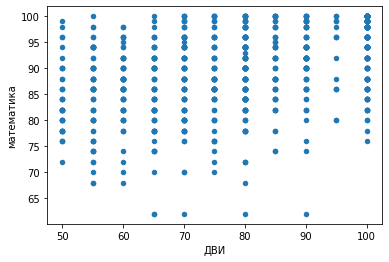

In [ ]:
entrants.plot.scatter("ДВИ", "математика")

Кажется, что распределение баллов по математике при каждом фиксированном балле за ДВИ почти равномерное в области "Балл за математику > 75". Но так ли это в действительности? Может быть, все дело в особенности отображения поточечного графика?

Нарисуем другой тип графика — так называемые "свечи":

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


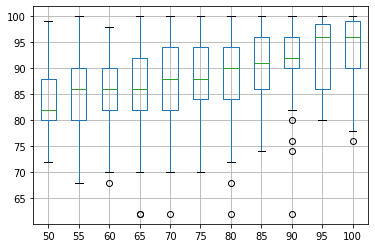

In [ ]:
entrants.pivot_table(index='№', columns='ДВИ', values='математика').boxplot()

Обратите внимание, мы действительно наблюдаем смещение медианного значения балла ЕГЭ по математике ближе к 100 при увеличении баллов за ДВИ. Это подтверждает нашу гипотезу. Проверим это, применив усреднение

In [ ]:
entrants.pivot_table(index='ДВИ', values='математика', aggfunc='mean')

,математика
ДВИ,
50,84.073171
55,85.217391
60,86.408451
65,85.467532
70,87.857143
75,88.162162
80,89.401361
85,90.433333
90,91.817073


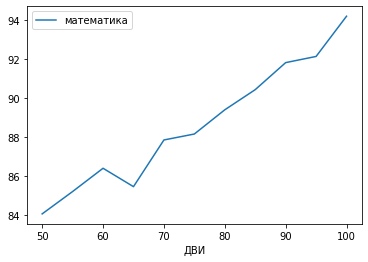

In [ ]:
entrants.pivot_table(index='ДВИ', values='математика', aggfunc='mean').plot()

Есть ли подобные корелляции в случае с парой "Физика"/"Математика"?

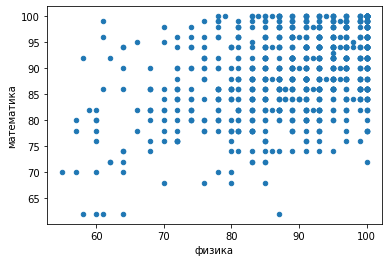

In [ ]:
entrants.plot.scatter("физика", "математика")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


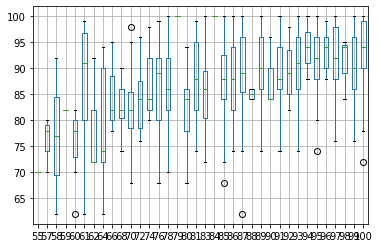

In [ ]:
entrants.pivot_table(index='№', columns='физика', values='математика').boxplot()

Здесь корелляция видна невооруженным глазом. Протестируем другие пары предметов

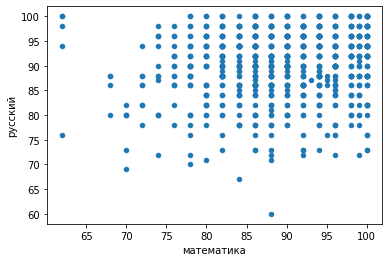

In [ ]:
entrants.plot.scatter("математика", "русский")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


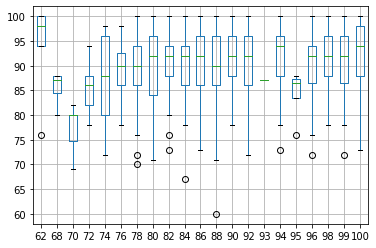

In [ ]:
entrants.pivot_table(index='№', columns='математика', values='русский').boxplot()

С русским языком такой корелляции не прослеживается. Это объяснимо: знание физики и математики связано друг с другом, как и способность студента одновременно хорошо сдать математику ДВИ и математику ЕГЭ. С русским языком же такой зависимости не наблюдается.

Напоследок проверим следующую гипотезу:

Среди студентов, сдавших ЕГЭ на 100 баллов, подавляющее большинство сдало ДВИ также на 100 (или почти 100) баллов.

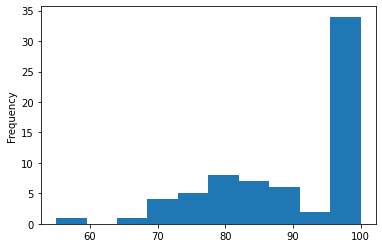

In [ ]:
entrants.query("`математика` == 100")["ДВИ"].plot.hist(bins=10)

Последняя гипотеза также оказалась верна. На деле не всегда бывает так.

In [ ]:
data

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False
1,1,2008-05-01,Thu,0.076192,3.167181e+06,True
2,2,2008-05-02,Fri,-0.868510,9.589767e+06,False
3,3,2008-05-03,Sat,-0.427011,8.949415e+06,False
4,4,2008-05-04,Sun,0.253255,9.371634e+05,True
5,5,2008-05-05,Mon,-0.681516,9.495799e+05,False
6,6,2008-05-06,Tue,0.007191,7.268427e+06,True
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True
8,8,2008-05-08,Thu,-1.184101,1.920960e+06,False
9,9,2008-05-09,Fri,-1.580369,8.456241e+06,False


In [ ]:
data

AttributeError: ignored